In [4]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('bonus_dataset.csv')
df.head()

,employee_id,performance,years_of_experience,projects_completed,bonus
0,EMP_001,7,2,4,124
1,EMP_002,4,1,4,82
2,EMP_003,8,7,10,178
3,EMP_004,5,7,8,138
4,EMP_005,7,8,9,170


In [6]:
df['performance']

0      7
1      4
2      8
3      5
4      7
      ..
95    10
96     9
97     7
98     9
99     8
Name: performance, Length: 100, dtype: int64

In [7]:
df['performance'].values

array([ 7,  4,  8,  5,  7, 10,  3,  7,  8,  5,  4,  8,  8,  3,  6,  5,  2,
        8,  6,  2,  5,  1, 10,  6,  9,  1, 10,  3,  7,  4,  9,  3,  5,  3,
        7,  5,  9,  7,  2,  4,  9,  2, 10,  9, 10,  5,  2,  4,  7,  8,  3,
        1,  4,  2,  8,  4,  2,  6,  6, 10,  4,  6,  2, 10,  2, 10,  4,  8,
        7,  9,  8,  5,  2,  5,  8, 10,  9,  9,  1,  9,  7,  9,  8,  1,  8,
        8,  3,  1,  8,  3,  3,  1,  5, 10,  7, 10,  9,  7,  9,  8])

In [8]:
type(df['performance'].values)

numpy.ndarray

In [9]:
performance = torch.tensor(df['performance'].values, dtype= torch.float32 )

In [10]:
years_of_experience = torch.tensor(df['years_of_experience'].values, dtype= torch.float32 )
years_of_experience 

tensor([ 2.,  1.,  7.,  7.,  8.,  5.,  3.,  8.,  6.,  3.,  1.,  3.,  5.,  3.,
         1.,  5., 10.,  7.,  7.,  9., 10., 10.,  3.,  7.,  1.,  4.,  4.,  5.,
         7.,  7.,  4.,  7.,  3.,  6.,  2., 10.,  9.,  5.,  6.,  4., 10.,  7.,
         9.,  7.,  1.,  1.,  9.,  9.,  4.,  9.,  3.,  7.,  6.,  8.,  9.,  5.,
         1.,  3., 10.,  8.,  6.,  8.,  9.,  4.,  1.,  1., 10.,  4.,  7.,  2.,
         3.,  1.,  5.,  1.,  8.,  1.,  1.,  2.,  2.,  6.,  7.,  5.,  1.,  1.,
         3.,  2.,  5., 10.,  6.,  7.,  4.,  7.,  8.,  1.,  6.,  8.,  5.,  4.,
         2.,  6.])

In [11]:
projects_completed = torch.tensor(df['projects_completed'].values, dtype= torch.float32 )

In [12]:
bonus = torch.tensor(df['bonus'].values, dtype= torch.float32 )

## Batch Gradient Descent 

In [13]:
w1 = torch.rand(1,requires_grad = True)
w2 = torch.rand(1,requires_grad = True)
w3 = torch.rand(1,requires_grad = True)
bias = torch.rand(1,requires_grad = True)
w1,w2,w3,bias

(tensor([0.9285], requires_grad=True),
 tensor([0.3810], requires_grad=True),
 tensor([0.0412], requires_grad=True),
 tensor([0.3549], requires_grad=True))

In [14]:
epochs = 5000
learning_rate = 0.004
loss_history = []

for epoch in range(epochs):
    predicted_bonus = w1 * performance + w2 * years_of_experience + w3 * projects_completed + bias
    loss = ((predicted_bonus - bonus) ** 2).mean()
    loss_history.append(loss.item()) 

    loss.backward()

    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w3 -= learning_rate * w3.grad
        bias -= learning_rate * bias.grad

    # reset gradients to zero
    w1.grad.zero_()
    w2.grad.zero_()
    w3.grad.zero_()
    bias.grad.zero_()

    if epoch % 100 == 0:
        print(f'Epoch : {epoch}, loss : {loss.item():0.2f}')


Epoch : 0, loss : 17764.33
Epoch : 100, loss : 18.67
Epoch : 200, loss : 17.04
Epoch : 300, loss : 15.56
Epoch : 400, loss : 14.21
Epoch : 500, loss : 12.98
Epoch : 600, loss : 11.85
Epoch : 700, loss : 10.82
Epoch : 800, loss : 9.88
Epoch : 900, loss : 9.03
Epoch : 1000, loss : 8.24
Epoch : 1100, loss : 7.53
Epoch : 1200, loss : 6.88
Epoch : 1300, loss : 6.28
Epoch : 1400, loss : 5.73
Epoch : 1500, loss : 5.24
Epoch : 1600, loss : 4.78
Epoch : 1700, loss : 4.37
Epoch : 1800, loss : 3.99
Epoch : 1900, loss : 3.64
Epoch : 2000, loss : 3.33
Epoch : 2100, loss : 3.04
Epoch : 2200, loss : 2.78
Epoch : 2300, loss : 2.53
Epoch : 2400, loss : 2.31
Epoch : 2500, loss : 2.11
Epoch : 2600, loss : 1.93
Epoch : 2700, loss : 1.76
Epoch : 2800, loss : 1.61
Epoch : 2900, loss : 1.47
Epoch : 3000, loss : 1.34
Epoch : 3100, loss : 1.23
Epoch : 3200, loss : 1.12
Epoch : 3300, loss : 1.02
Epoch : 3400, loss : 0.93
Epoch : 3500, loss : 0.85
Epoch : 3600, loss : 0.78
Epoch : 3700, loss : 0.71
Epoch : 3800,

In [15]:
w1.item(),w2.item(),w3.item(),bias.item()

(12.085075378417969, 5.708133697509766, 2.3893675804138184, 18.09880256652832)

In [16]:
w1.item() * 3 + w2.item() * 3 + w3.item() * 5 + bias.item()

83.42526769638062

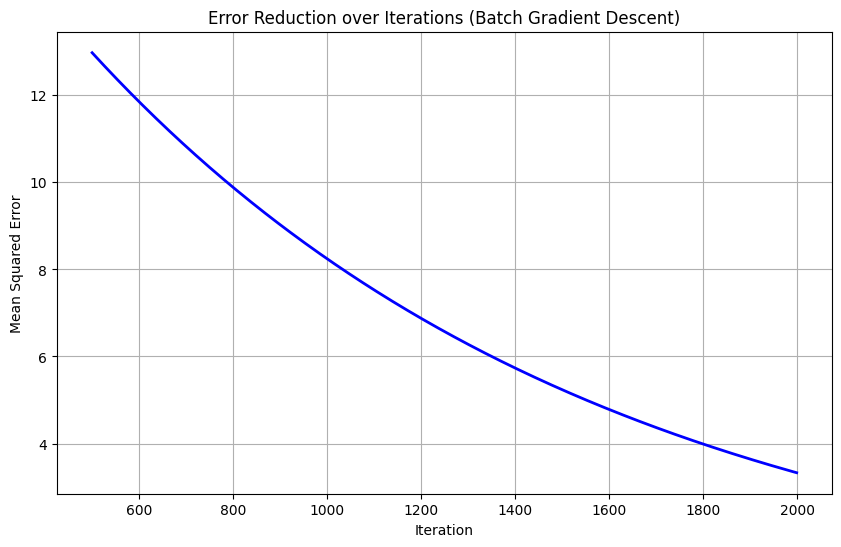

In [17]:
def plot_loss(epochs,loss_history,title):
     # Plotting the error over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss_history, color='blue', linewidth=2)
    plt.title(title)
    plt.xlabel("Iteration")
    plt.ylabel("Mean Squared Error")
    plt.grid(True)
    plt.show()
plot_loss(range(500, 2000), loss_history[500:2000], "Error Reduction over Iterations (Batch Gradient Descent)")    

## Mini Batch GD

In [18]:
w1 = torch.rand(1,requires_grad = True)
w2 = torch.rand(1,requires_grad = True)
w3 = torch.rand(1,requires_grad = True)
bias = torch.rand(1,requires_grad = True)

Creates a tensor of size 1 (a single scalar value).

The value is sampled randomly from a uniform distribution in the range [0, 1).
requires_grad=True tells PyTorch to track this tensor in the computation graph, so gradients w.r.t. this variable will be computed during backpropagation.

So, this will behave like a weight parameter in a model. 
Intuition

Think of it like you’re setting up a small neural network with 3 inputs and 1 output.
Your model could look like this:

 y = w1 * x1 + w2 *x2 + w3 * x3 + bias
Here:

w1, w2, w3 → weights (slopes that scale the inputs)

bias → intercept (shifts the output up/down)

PyTorch will later update these during training using gradient descent.

In [19]:
w1,w2,w3,bias

(tensor([0.3305], requires_grad=True),
 tensor([0.7605], requires_grad=True),
 tensor([0.8766], requires_grad=True),
 tensor([0.5379], requires_grad=True))

In [20]:
len(performance), type(performance) , performance.shape

(100, torch.Tensor, torch.Size([100]))

In [44]:
# Initialize weights and bias randomly
w1 = torch.rand(1, requires_grad=True)
w2 = torch.rand(1, requires_grad=True)
w3 = torch.rand(1, requires_grad=True)
bias = torch.rand(1, requires_grad=True)

# Parameters for Mini-Batch Gradient Descent
learning_rate = 0.003
epochs = 2000
batch_size = 10  # Define the batch size

# Number of samples
n_samples = len(performance)

loss_history_2 = []

# Training loop for mini-batch gradient descent
for epoch in range(epochs):
    for i in range(0, n_samples, batch_size):
        # Select the mini-batch
        batch_performance = performance[i:i + batch_size]
        batch_years_of_experience = years_of_experience[i:i + batch_size]
        batch_projects_completed = projects_completed[i:i + batch_size]
        batch_bonus = bonus[i:i + batch_size]
        
        # Compute the predicted bonus using the current weights and bias
        predicted_bonus = w1 * batch_performance + w2 * batch_years_of_experience + w3 * batch_projects_completed + bias
        
        # Compute the Mean Squared Error (MSE) loss
        loss = ((predicted_bonus - batch_bonus) ** 2).mean()
        loss_history_2.append(loss.item())
        
        # Perform backpropagation to compute gradients of the loss with respect to w1, w2, w3, and bias
        loss.backward()
        
        # Update the weights and bias using the computed gradients
        with torch.no_grad():
            w1 -= learning_rate * w1.grad
            w2 -= learning_rate * w2.grad
            w3 -= learning_rate * w3.grad
            bias -= learning_rate * bias.grad

        # Zero the gradients after updating
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()
        bias.grad.zero_()
        
    # Print the loss at regular intervals
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Print the learned weights and bias
print(f"Learned weights: w1 = {w1.item():.4f}, w2 = {w2.item():.4f}, w3 = {w3.item():.4f}")
print(f"Learned bias: {bias.item():.4f}")

Epoch [100/2000], Loss: 9.6074
Epoch [200/2000], Loss: 4.7838
Epoch [300/2000], Loss: 2.3933
Epoch [400/2000], Loss: 1.1976
Epoch [500/2000], Loss: 0.5993
Epoch [600/2000], Loss: 0.2999
Epoch [700/2000], Loss: 0.1501
Epoch [800/2000], Loss: 0.0751
Epoch [900/2000], Loss: 0.0376
Epoch [1000/2000], Loss: 0.0188
Epoch [1100/2000], Loss: 0.0094
Epoch [1200/2000], Loss: 0.0047
Epoch [1300/2000], Loss: 0.0024
Epoch [1400/2000], Loss: 0.0012
Epoch [1500/2000], Loss: 0.0006
Epoch [1600/2000], Loss: 0.0003
Epoch [1700/2000], Loss: 0.0001
Epoch [1800/2000], Loss: 0.0001
Epoch [1900/2000], Loss: 0.0000
Epoch [2000/2000], Loss: 0.0000
Learned weights: w1 = 12.0008, w2 = 5.9973, w3 = 2.0037
Learned bias: 19.9823


In [45]:
len(loss_history_2),n_samples

(20000, 100)

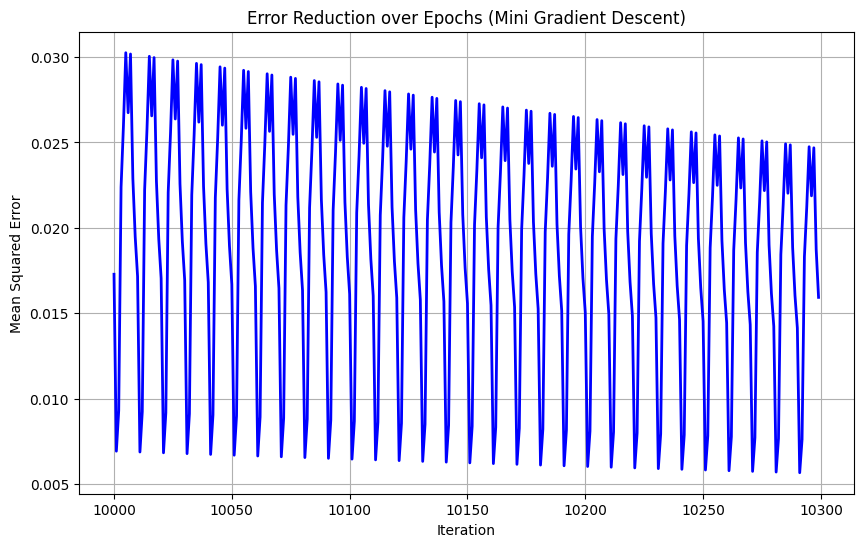

In [48]:
plot_loss(range(10000,10300), loss_history[10000:10300], "Error Reduction over Epochs (Mini Gradient Descent)")

Epoch [100/500], Loss: 0.0000
Epoch [200/500], Loss: 0.0000
Epoch [300/500], Loss: 0.0000
Epoch [400/500], Loss: 0.0000
Epoch [500/500], Loss: 0.0000
Learned weights: w1 = 12.0000, w2 = 6.0000, w3 = 2.0000
Learned bias: 19.9998


In [50]:
len(loss_history_3)

50000

In [ ]:
plot_loss(range(1000,1300), loss_history[1000:1300], "Error Reduction over Iterations (SGD)")

## Stochastic Gradient Descent

In [51]:
# Initialize weights and bias randomly
w1 = torch.randn(1, requires_grad=True)
w2 = torch.randn(1, requires_grad=True)
w3 = torch.randn(1, requires_grad=True)
bias = torch.randn(1, requires_grad=True)

# Parameters for Stochastic Gradient Descent
learning_rate = 0.001
epochs = 500

# Number of samples
n_samples = len(performance)

loss_history1 = []

# Training loop for stochastic gradient descent
for epoch in range(epochs):
    for i in range(n_samples):
        # Select a single data point
        single_performance = performance[i]
        single_years_of_experience = years_of_experience[i]
        single_projects_completed = projects_completed[i]
        single_bonus = bonus[i]
        
        # Compute the predicted bonus using the current weights and bias
        predicted_bonus = w1 * single_performance + w2 * single_years_of_experience + w3 * single_projects_completed + bias
        
        # Compute the Mean Squared Error (MSE) loss for this data point
        loss = (predicted_bonus - single_bonus) ** 2
        
        if i%10==0:
            loss_history1.append(loss.item())
        
        # Perform backpropagation to compute gradients of the loss with respect to w1, w2, w3, and bias
        loss.backward()
        
        # Update the weights and bias using the computed gradients
        with torch.no_grad():
            w1 -= learning_rate * w1.grad
            w2 -= learning_rate * w2.grad
            w3 -= learning_rate * w3.grad
            bias -= learning_rate * bias.grad

        # Zero the gradients after updating
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()
        bias.grad.zero_()
        
    # Print the loss at regular intervals
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Print the learned weights and bias
print(f"Learned weights: w1 = {w1.item():.4f}, w2 = {w2.item():.4f}, w3 = {w3.item():.4f}")
print(f"Learned bias: {bias.item():.4f}")

Epoch [100/500], Loss: 0.7467
Epoch [200/500], Loss: 0.0660
Epoch [300/500], Loss: 0.0058
Epoch [400/500], Loss: 0.0005
Epoch [500/500], Loss: 0.0000
Learned weights: w1 = 12.0023, w2 = 5.9929, w3 = 2.0091
Learned bias: 19.9554


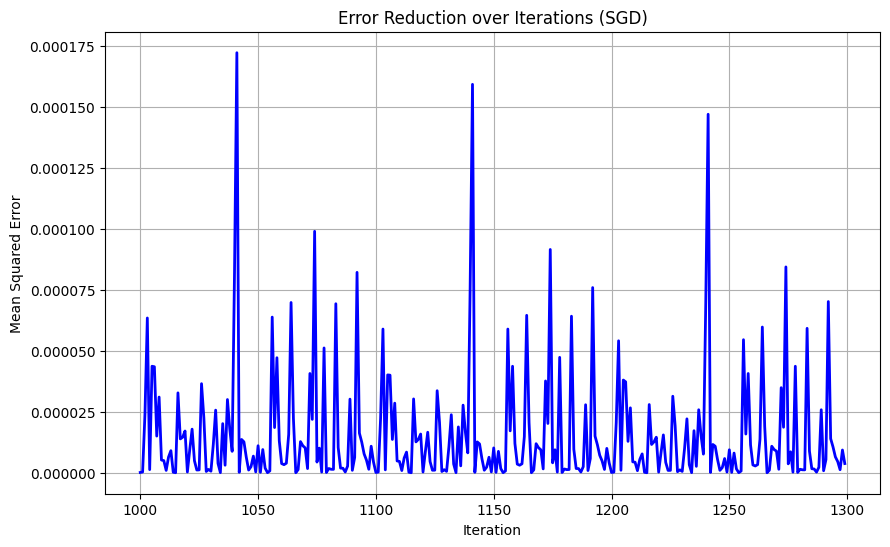

In [53]:
plot_loss(range(1000,1300), loss_history_3[1000:1300], "Error Reduction over Iterations (SGD)")